In [1]:
from datasets import load_dataset
import os
from tqdm import tqdm
import random

random.seed(42)

/home/omote/cluster_project/iam2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_root_dir = "/data_ssd/huggingface_dataset"
cache_dir = "/data_ssd/huggingface_cache"

dataset_id = os.path.join(dataset_root_dir,"BAAI/DenseFusion-1M")

In [4]:
dataset = load_dataset(dataset_id, cache_dir=cache_dir,name="DenseFusion-1M",split="train") # ['DenseFusion-4V-100K', 'DenseFusion-1M']

dict_keys(['image_id', 'caption', 'url', 'image_path'])
Number of samples: 1058790
sample: {'image_id': '1301634003858', 'caption': 'The image displays two clear plastic bags tied with white ribbons, each containing a colorful puzzle piece-shaped crayon. The crayons are yellow, orange, blue, and green, with the text "Puzzle Piece Crayon" visible on the wrapper. Attached to each crayon wrapper is a circular white sticker with text. The left sticker reads "Thank you for being a PIECE of my world! From, KENNETH" and the right sticker states "Autism Awareness Month 2019" followed by "Thank you for your support" and "Autism Society of South Carolina." Below the bags, there are four loose puzzle piece crayons, two of each color, arranged in a cross formation. The background is a plain, light surface that contrasts with the vibrant colors of the crayons and the white of the stickers.', 'url': 'https://i.etsystatic.com/7859360/r/il/f0e9bd/1831585292/il_570xN.1831585292_8e1p.jpg', 'image_path':

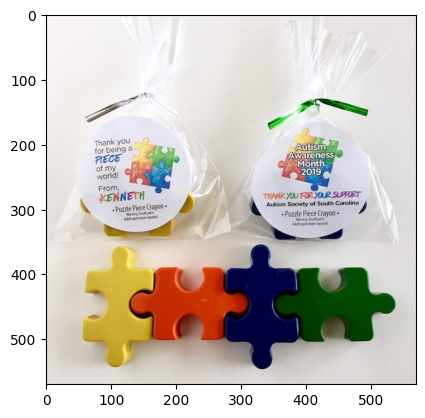

The image displays two clear plastic bags tied with white ribbons, each containing a colorful puzzle piece-shaped crayon. The crayons are yellow, orange, blue, and green, with the text "Puzzle Piece Crayon" visible on the wrapper. Attached to each crayon wrapper is a circular white sticker with text. The left sticker reads "Thank you for being a PIECE of my world! From, KENNETH" and the right sticker states "Autism Awareness Month 2019" followed by "Thank you for your support" and "Autism Society of South Carolina." Below the bags, there are four loose puzzle piece crayons, two of each color, arranged in a cross formation. The background is a plain, light surface that contrasts with the vibrant colors of the crayons and the white of the stickers.


In [8]:
import matplotlib.pyplot as plt
index = 100
print(dataset[index].keys())
print("Number of samples:", len(dataset))
print("sample:", dataset[index])

# Visualize the first sample
image = os.path.join("/data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images",dataset[index]['image_path'])
image = plt.imread(image)
plt.imshow(image)
plt.show()
print(dataset[index]['caption'])

In [ ]:
prompt_list_image_textualization = ['<image>\nWhat do you think is going on in this snapshot?', '<image>\nCan you describe the main features of this image for me?', '<image>\nCan you elaborate on the elements of the picture provided?', '<image>\nWhat are the key elements in this picture?', '<image>\nDescribe the following image.', "<image>\nWhat's happening in the scene?", '<image>\nWhat is this photo about?', '<image>\nAnalyze the image in a comprehensive and detailed manner.', '<image>\nWrite a detailed description of the given image.', '<image>\nExplain the visual content of the image in great detail.', '<image>\nWhat do you see happening in this image?']
prompt_list_sharegpt4o = ['<image>\nPlease describe in depth what this image is about.', '<image>\nCan you explain in detail what is happening in the picture?', '<image>\nPlease explain in detail the scene depicted in the picture.', '<image>\nPlease describe in detail the dynamic and static elements in this image.', '<image>\nPlease describe what is happening in the image.', '<image>\nCan you describe all the objects and characters in the picture?', '<image>\nDescribe this image.', '<image>\nPlease conduct an in-depth analysis of the scene in the picture.', '<image>\nPlease elaborate on what this image shows.', '<image>\nDescribe everything in the image', '<image>\nProvide a detailed description of the presented image.', '<image>\nWhat scene is mainly depicted in the picture?', '<image>\nDescribe the image, paying attention to its inner details.', '<image>\nWhat items or people are prominent in the picture?', '<image>\nDescribe the content of a given image in detail', '<image>\nPlease describe specifically what you observed in the picture and the possible scenes they might form.', '<image>\nWhat objects and people are shown in the picture?', '<image>\nPlease use detailed words to describe what the picture is about.', '<image>\nPlease describe specifically what this image is about.', '<image>\nPlease explain the scene depicted in the picture.', '<image>\nWhat scene is this picture depicting?', '<image>\nDescribe every detail in the picture.', '<image>\nWhat objects and people are in the picture?', '<image>\nWhat are the striking details of this image?', '<image>\nWhat is compelling about this image?', '<image>\nProvide a detailed description of the image.', '<image>\nProvide a detailed description of the main elements in the image.', '<image>\nPlease describe the scene depicted in this picture.', '<image>\nCan you describe what this image is about?', '<image>\nDescribe the given image', '<image>\nWhat elements and people are included in the image?', '<image>\nPlease explain the visual content of the image in detail.', '<image>\nPlease describe the content of the picture.', '<image>\nCan you explain what this image shows?', '<image>\nCan you analyze and elaborate on all the elements and details shown in this image?', '<image>\nWrite a detailed and comprehensive description of the image.', '<image>\nCan you list all the objects and people in the picture?', '<image>\nDescribe what the picture shows?', '<image>\nDescribe all the elements in the picture.', '<image>\nCan you describe the main elements in the image?', '<image>\nPlease interpret and describe each detail of this image and the overall scene they create.', '<image>\nPlease describe the situation in the picture as clearly as possible.', '<image>\nPlease describe the event or scene this image shows.', '<image>\nAnalyze and describe in detail the visual elements in this image.', '<image>\nCan you describe this photo in detail?', '<image>\nPlease describe the scene in the picture.', '<image>\nWhat details are worth noting in the picture?']
prompt_list = list(set(prompt_list_image_textualization + prompt_list_sharegpt4o))
prompt_list = \
[
 '<image>\nExplain the visual content of the image in great detail.', 
 '<image>\nPlease explain the visual content of the image in detail.', 
 
 '<image>\nPlease describe in depth what this image is about.',
 '<image>\nCan you explain in detail what is happening in the picture?',
 '<image>\nWrite a detailed description of the given image.', 
 '<image>\nPlease elaborate on what this image shows.',
 '<image>\nWhat items or people are prominent in the picture?',
 '<image>\nCan you elaborate on the elements of the picture provided?',
 '<image>\nAnalyze the image in a comprehensive and detailed manner.',
  '<image>\nWhat are the striking details of this image?', 
  '<image>\nWrite a detailed and comprehensive description of the image.',
  
  '<image>\nDescribe the image, paying attention to its inner details.', 
  '<image>\nAnalyze and describe in detail the visual elements in this image.', 
  '<image>\nDescribe the content of a given image in detail', 

  '<image>\nDescribe every detail in the picture.', 
  '<image>\nPlease explain in detail the scene depicted in the picture.', 
  '<image>\nPlease conduct an in-depth analysis of the scene in the picture.',
  '<image>\nCan you describe all the objects and characters in the picture?',
  '<image>\nProvide a detailed description of the presented image.', 
  '<image>\nPlease use detailed words to describe what the picture is about.',

   '<image>\nDescribe everything in the image',
   '<image>\nPlease describe specifically what you observed in the picture and the possible scenes they might form.',

   '<image>\nPlease interpret and describe each detail of this image and the overall scene they create.',
   '<image>\nDescribe all the elements in the picture.',
    '<image>\nProvide a detailed description of the image.',
    '<image>\nCan you describe this photo in detail?',
    '<image>\nCan you analyze and elaborate on all the elements and details shown in this image?',]
def make_conversation(id,image_path,question,answer,image_folder_root=None):
    if image_folder_root is not None:
        image_path = os.path.join(image_folder_root, image_path)
    return_data =   {
        "id": id,
        "image": image_path,
        "conversations": [
        {
            "from": "human",
            "value": f"{question}"
        },
        {
            "from": "gpt",
            "value": answer
        },
        ],
    }
    return return_data


In [20]:
for prompt in prompt_list:
    print(prompt)

<image>
Please explain the scene depicted in the picture.
<image>
Describe this image.
<image>
Provide a detailed description of the main elements in the image.
<image>
Describe the given image
<image>
Explain the visual content of the image in great detail.
<image>
Please explain the visual content of the image in detail.
<image>
Describe the following image.
<image>
Can you describe the main features of this image for me?
<image>
Please describe in depth what this image is about.
<image>
Can you explain in detail what is happening in the picture?
<image>
Write a detailed description of the given image.
<image>
Please elaborate on what this image shows.
<image>
What items or people are prominent in the picture?
<image>
Please describe the scene in the picture.
<image>
Can you elaborate on the elements of the picture provided?
<image>
Analyze the image in a comprehensive and detailed manner.
<image>
Please describe what is happening in the image.
<image>
Can you list all the objects an

In [21]:
print(prompt_list)

['<image>\nPlease explain the scene depicted in the picture.', '<image>\nDescribe this image.', '<image>\nProvide a detailed description of the main elements in the image.', '<image>\nDescribe the given image', '<image>\nExplain the visual content of the image in great detail.', '<image>\nPlease explain the visual content of the image in detail.', '<image>\nDescribe the following image.', '<image>\nCan you describe the main features of this image for me?', '<image>\nPlease describe in depth what this image is about.', '<image>\nCan you explain in detail what is happening in the picture?', '<image>\nWrite a detailed description of the given image.', '<image>\nPlease elaborate on what this image shows.', '<image>\nWhat items or people are prominent in the picture?', '<image>\nPlease describe the scene in the picture.', '<image>\nCan you elaborate on the elements of the picture provided?', '<image>\nAnalyze the image in a comprehensive and detailed manner.', '<image>\nPlease describe what

In [16]:
save_json_data = []

for i, sample in tqdm(enumerate(dataset), total=len(dataset)):
    image_path = sample["image_path"]
    question = random.choice(prompt_list)
    answer = sample["caption"]
    id = f"DenseFusion-1M-{sample["image_id"]}"
    
    conversation = make_conversation(id=id, image_path=image_path, question=question, answer=answer)
    
    save_json_data.append(conversation)
    break

  0%|          | 0/1058790 [00:00<?, ?it/s]


In [17]:
print(save_json_data)

[{'id': 'DenseFusion-1M-3340022002763', 'image': 'DenseFusion-1M/000000/3340022002763.png', 'conversations': [{'from': 'human', 'value': '<image>\nCan you describe the main features of this image for me?'}, {'from': 'gpt', 'value': 'The image displays four different styles of foldable hard cases designed for sunglasses, each with a unique color and pattern. At the top of the image, there is a logo with the text "MF SUNNIES" and the hashtag "#SE01" below it. The cases are arranged in a 2x2 grid against a white background.\n\nIn the top left, there is a beige case with a smiley face design featuring various expressions such as winking, smiling, and sleepy. The top right case is purple with a pattern of black fish faces and bubbles.\n\nThe bottom left case is light blue with a design of black sunglasses and the word "smile" in different fonts and orientations. The bottom right case is dark brown with a pattern of cartoonish fish faces and bubbles, similar to the top right case but with a 

In [4]:
import json
import tqdm

def load_json(file_path):
    """
    Load a JSON file and return its content as a Python dictionary.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: The content of the JSON file as a dictionary.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data
def save_json(data, file_path):
    """
    Save a Python dictionary to a JSON file.

    Parameters:
        data (dict): The data to save.
        file_path (str): The path where the JSON file will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [11]:
data = load_json("/data_ssd/DenseFusion1M/densefusion1m-train.json")

In [12]:
image_root_dir = "/data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images"

In [ ]:
import os

new_json_data = []
for item in tqdm.tqdm(data):
    image_path = item["image"]
    image_path = os.path.join(image_root_dir, image_path)
    if not os.path.exists(image_path):
        print(f"Image path does not exist: {image_path}")
    else:
        new_json_data.append(item)

  6%|▌         | 58693/1058790 [00:12<03:55, 4237.78it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/1278740002463.png


  9%|▉         | 96761/1058790 [00:21<03:25, 4678.88it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/814546033157.png


 10%|█         | 106598/1058790 [00:23<03:46, 4212.07it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1208025008357.png


 12%|█▏        | 124082/1058790 [00:27<03:10, 4900.91it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/3403520001988.png


 17%|█▋        | 176773/1058790 [00:39<02:55, 5014.09it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/4219522007278.png


 17%|█▋        | 184984/1058790 [00:41<02:47, 5223.67it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/3440777010841.png


 20%|██        | 215239/1058790 [00:48<03:18, 4242.47it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3180275001959.png


 22%|██▏       | 235683/1058790 [00:53<03:18, 4147.42it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3031479017142.png


 24%|██▍       | 257732/1058790 [00:58<03:11, 4190.79it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3130788013637.png


 28%|██▊       | 292769/1058790 [01:07<03:25, 3729.53it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3195237000530.png


 31%|███       | 326808/1058790 [01:15<02:56, 4156.11it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3576407015823.png


 33%|███▎      | 348458/1058790 [01:20<02:34, 4600.33it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1046195008567.png


 41%|████      | 436235/1058790 [01:38<02:16, 4560.98it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1054033004287.png


 44%|████▎     | 461636/1058790 [01:43<02:08, 4655.39it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3731304002782.png


 45%|████▌     | 479297/1058790 [01:47<01:42, 5662.85it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/2250516010363.png


 47%|████▋     | 501276/1058790 [01:51<01:47, 5200.14it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3654951000095.png


 48%|████▊     | 505358/1058790 [01:52<01:53, 4860.93it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1209158000628.png


 53%|█████▎    | 556358/1058790 [02:02<01:32, 5439.30it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/2560328001138.png


 56%|█████▌    | 594685/1058790 [02:09<01:29, 5164.46it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/4066473001135.png


 58%|█████▊    | 610190/1058790 [02:12<01:23, 5387.33it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3703738007827.png


 58%|█████▊    | 616360/1058790 [02:14<01:40, 4410.45it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/2325364014755.png


 61%|██████    | 642746/1058790 [02:19<01:32, 4495.48it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/2672118003149.png


 62%|██████▏   | 651991/1058790 [02:21<01:34, 4285.46it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/4128333009121.png


 63%|██████▎   | 670871/1058790 [02:26<01:35, 4044.23it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3467278016467.png


 64%|██████▍   | 676386/1058790 [02:27<01:43, 3706.31it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3005392007281.png


 65%|██████▌   | 688541/1058790 [02:30<01:09, 5336.85it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/4094056000282.png


 65%|██████▌   | 691653/1058790 [02:30<01:21, 4483.48it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3047083005407.png


 71%|███████   | 746770/1058790 [02:44<01:10, 4417.34it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3874848011357.png


 73%|███████▎  | 767889/1058790 [02:49<01:10, 4146.95it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/2264345004390.png


 74%|███████▎  | 778645/1058790 [02:51<01:14, 3749.97it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1219211016052.png


 80%|████████  | 850388/1058790 [03:07<00:39, 5306.74it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/3618266013541.png


 84%|████████▍ | 887058/1058790 [03:14<00:31, 5501.76it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/4234528001636.png
Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/2026819038171.png


 94%|█████████▍| 993608/1058790 [03:34<00:14, 4403.64it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/1084772004006.png


 99%|█████████▉| 1051398/1058790 [03:46<00:01, 4838.20it/s]

Updated image path: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/3597269006784.png


100%|██████████| 1058790/1058790 [03:48<00:00, 4633.75it/s]


In [14]:
save_json(new_json_data, "/data_ssd/DenseFusion1M/densefusion1m-train-existed.json")

In [15]:
print(len(new_json_data))

1058755


# image読み込み確認

In [ ]:
new_json_path = "/data_ssd/DenseFusion1M/densefusion1m-train-existed.json"
new_json_data = load_json(new_json_path)

In [6]:
image_root_dir = "/data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images"

In [7]:
correct_json_data = []
invalid_json_data = []
from PIL import Image
from tqdm import tqdm
for item in tqdm(new_json_data):
    image_path = item["image"]
    image_path = os.path.join(image_root_dir, image_path)
    try:
        img = Image.open(image_path)
        img.verify()  # Verify that it is an image
        img.close()  # Close the image file
        correct_json_data.append(item)
    except (IOError, SyntaxError) as e:
        print(f"Invalid image file: {image_path}, Error: {e}")
        invalid_json_data.append(item)
        
   

  4%|▎         | 38341/1058755 [02:53<1:17:39, 219.01it/s]

Invalid image file: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000072/2467575000241.png, Error: Truncated File Read


 30%|███       | 319203/1058755 [23:33<1:01:04, 201.80it/s]

Invalid image file: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3428623000796.png, Error: cannot identify image file '/data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/3428623000796.png'


 46%|████▌     | 484113/1058755 [35:35<39:32, 242.19it/s]  

Invalid image file: /data_ssd/huggingface_dataset/BAAI/DenseFusion-1M/images/DenseFusion-1M/000099/2895978003295.png, Error: Truncated File Read


 72%|███████▏  | 762825/1058755 [56:02<21:35, 228.43it/s]  /home/omote/cluster_project/iam2/.venv/lib/python3.12/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (162715536 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 1058755/1058755 [1:17:34<00:00, 227.46it/s]
